<a href="https://colab.research.google.com/github/Maria-Ul/Advanced-ML/blob/main/%D0%98%D0%BD%D0%B4%D0%B8%D0%B2%D0%B8%D0%B4%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


В этом упражнении вам предлагается построить классификатор на наборе данных, полученных Национальным институтом диабета, болезней органов пищеварения и почек (National Institute of Diabetes and Digestive and Kidney Diseases). Цель состоит в том, чтобы ответить на вопрос: есть ли у пациента диабет, основываясь на определенных диагностических измерениях, включенных в набор данных, который получен из исходной базы данных наложением нескольких ограничений. В частности, в рассматриваемых в задании данных, все пациенты — женщины не менее 21 года индийского происхождения Пима.

Набор данных состоит из таких предикторов, как количество беременностей у пациентки, индекс массы тела, уровень инсулина, возраст и так далее. Отклик принимает два значение — больна (1) диабетом или нет (0).

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Для визуализации дерева принятия решений можете воспользоваться библиотекой graphviz и кодом (где x — тренировочный набор данных, clf — обученное ДПР):



In [ ]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot',
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False,
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

1. Скачайте исходный набор данных и отделите от него первые 670 строк.

Введите число строк в получившейся выборке относящихся к классу 0 (пациент не болен диабетом).

In [ ]:
data = pd.read_csv("/content/diabetes.csv")

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data_1 = data[:670]

In [ ]:
data_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
665,1,112,80,45,132,34.8,0.217,24,0
666,4,145,82,18,0,32.5,0.235,70,1
667,10,111,70,27,0,27.5,0.141,40,1
668,6,98,58,33,190,34.0,0.430,43,0


In [ ]:
data_1[(data_1['Outcome'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
658,11,127,106,0,0,39.0,0.190,51,0
660,10,162,84,0,0,27.7,0.182,54,0
665,1,112,80,45,132,34.8,0.217,24,0
668,6,98,58,33,190,34.0,0.430,43,0


2. Разделите полученную выборку на тренировочную и тестовую части, в отношении 80/20 (первые 80% строк — тренировочный набор данных, остальные 20% — тестовый). Предикторами служат столбцы Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age. Отклик — Outcome.



In [ ]:
train = data_1[:int(0.8*(len(data_1)))]
test = data_1[int(0.8*(len(data_1))):]

In [ ]:
X_train = train.drop(['Outcome'], axis = 1)
X_test = test.drop(['Outcome'], axis = 1)

In [ ]:
Y_train = train['Outcome']
Y_test = test['Outcome']

3. Обучите классификатор используя DecisionTreeClassifier с параметрами criterion='entropy', max_leaf_nodes = 10, min_samples_leaf = 10 и random_state = 2020.

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_leaf_nodes=10, random_state=2020)


In [ ]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10,
                       min_samples_leaf=10, random_state=2020)

4. Изучите получившееся дерево принятия решений.





Введите глубину дерева:


In [ ]:
clf.get_depth()

6

По какому предиктору выполнено разделение на последнем уровне дерева принятия решений (если таких узлов несколько, введите название любого из них):


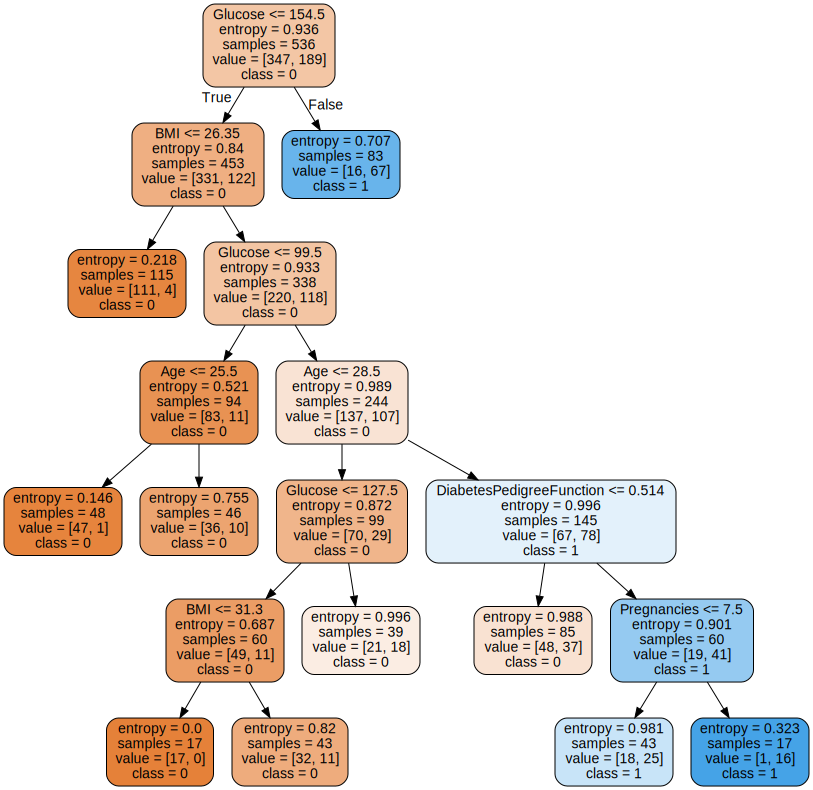

In [ ]:
x = X_train
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot',
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False,
                precision = 3, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Введите значение разделения для указанного предиктора с точностью до сотых:
bmi 31.1

5. Оцените модель с помощью тестовых данных.



In [ ]:
y_pred = clf.predict(X_test)

Введите долю правильных ответов:


In [ ]:
round(clf.score(X_test, Y_test),2)

0.82

Введите среднее значение метрик  (Macro-F1):


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
round(f1_score(Y_test, y_pred,  average = 'macro'),2)

0.78

6. Выполните предсказание для пациентов 712, 749, 703, 740 (указаны номера строк, нумерация с нуля) из начального набора данных.



In [ ]:
predictor = data.drop(['Outcome'], axis = 1)

In [ ]:
predictor.iloc[712]

Pregnancies                  10.000
Glucose                     129.000
BloodPressure                62.000
SkinThickness                36.000
Insulin                       0.000
BMI                          41.200
DiabetesPedigreeFunction      0.441
Age                          38.000
Name: 712, dtype: float64

In [ ]:
clf.predict(np.array(predictor.iloc[712]).reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
data.iloc[712]['Outcome']

1.0

In [ ]:
clf.predict(np.array(predictor.iloc[749]).reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
data.iloc[749]['Outcome']

1.0

In [ ]:
clf.predict(np.array(predictor.iloc[703]).reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
data.iloc[703]['Outcome']

0.0

In [ ]:
clf.predict(np.array(predictor.iloc[740]).reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
data.iloc[740]['Outcome']

1.0